## Importing the dependecies

In [1]:
# ! pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

In [2]:
# gym stuff
import gym
import gym_anytrading

#Stable baselines
from stable_baselines.common.vec_env import DummyVecEnv #it is a wrapper
from stable_baselines import A2C #A2C is RL algorithm

#processing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



C:\Users\Sumit\anaconda3\envs\tf1.5\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


## MarketWatch GME data

In [3]:
df = pd.read_csv('data/HDB.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


# Coverting date to datetimeformat

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Adj Close  252 non-null    float64       
 6   Volume     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [6]:
# df['Open'] = df['Open'].apply(lambda x: float(x.replace(",","")))

In [7]:
# df['High'] = df['High'].apply(lambda x: float(x.replace(",","")))

In [8]:
# df['Low'] = df['Low'].apply(lambda x: float(x.replace(",","")))

In [9]:
# df['Close'] = df['Close'].apply(lambda x: float(x.replace(",","")))

In [10]:
#Sorting the data from oldest to newest
df.sort_values('Date',ascending=True,inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-18,43.509998,44.419998,43.400002,43.750000,43.750000,1419500
1,2020-06-19,44.630001,45.080002,44.099998,44.689999,44.689999,2611700
2,2020-06-22,44.590000,45.119999,44.360001,44.720001,44.720001,1751900
3,2020-06-23,45.509998,46.230000,45.349998,45.430000,45.430000,2453300
4,2020-06-24,44.799999,44.799999,43.650002,44.110001,44.110001,1616500


In [11]:
# Set index as date
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-18,43.509998,44.419998,43.400002,43.750000,43.750000,1419500
2020-06-19,44.630001,45.080002,44.099998,44.689999,44.689999,2611700
2020-06-22,44.590000,45.119999,44.360001,44.720001,44.720001,1751900
2020-06-23,45.509998,46.230000,45.349998,45.430000,45.430000,2453300
2020-06-24,44.799999,44.799999,43.650002,44.110001,44.110001,1616500


In [12]:
env = gym.make('stocks-v0',df=df,frame_bound=(5,250),window_size=5)
#window_size = how many previous timestep data our bot is going to have for referce to make a trade
#frame_bound = specifies how much data we want to pass through our environment we are gonna start at 5th time step 
#and go all the way to the hundredth time_step . 

`Note since our window size is 5 and frame_bound's initial value is also 5 our env.prices will start from very first day i.e. 05/25/2021`

`And if our frame bound's initial value is changed to (10,100) from (5,100) our env.prices will start from 5 day later i.e. 05/18/2021`

In [13]:
print("(env.prices\n",env.prices)
print("env.signal_features\n",env.signal_features) #it shows price and change in price from previous timestep


(env.prices
 [43.75     44.689999 44.720001 45.43     44.110001 45.650002 45.09
 45.619999 45.459999 47.93     47.759998 48.82     47.919998 48.630001
 48.549999 48.389999 47.02     46.299999 46.73     46.459999 47.279999
 51.509998 52.049999 50.119999 50.150002 50.25     48.549999 48.5
 48.709999 47.529999 46.75     45.759998 46.310001 46.41     46.310001
 46.529999 46.139999 47.040001 47.150002 47.150002 46.669998 45.869999
 47.57     47.189999 47.720001 48.400002 49.709999 50.09     49.720001
 49.41     51.09     49.599998 51.27     51.759998 50.889999 50.099998
 49.470001 49.849998 49.27     49.330002 48.82     49.490002 50.459999
 50.23     48.990002 48.09     48.27     48.080002 47.639999 48.630001
 48.540001 48.959999 49.959999 51.779999 51.77     52.52     53.290001
 53.950001 54.849998 56.220001 55.75     55.709999 56.41     55.400002
 56.       57.400002 58.900002 59.779999 60.02     60.360001 59.450001
 59.900002 58.57     57.599998 57.439999 59.040001 60.150002 61.439999
 6

## Build Environment

 n_state
[[ 7.6949997e+01  2.9999000e-02]
 [ 7.7250000e+01  3.0000300e-01]
 [ 7.7239998e+01 -1.0002000e-02]
 [ 7.7459999e+01  2.2000100e-01]
 [ 7.6720001e+01 -7.3999800e-01]]
 reward
0
  done
True
  info
{'total_reward': 8.179988999999978, 'total_profit': 0.41571718424619025, 'position': 1}
 


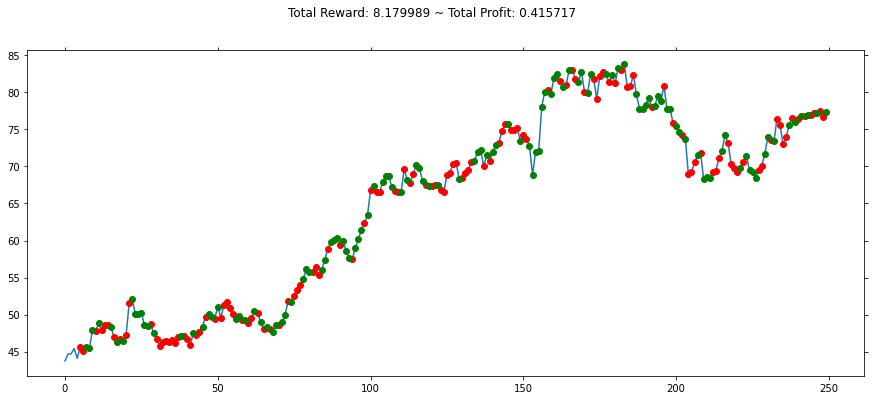

In [14]:
#Taking random steps/ Testing the env
state = env.reset() #it allows us to get initial state
while True:
    action = env.action_space.sample() #looping through each index and taking random action
    n_state,reward,done,info = env.step(action) #applying action to our environment. and storing them in variables
    if done: 
        print(f" n_state\n{n_state}\n reward\n{reward}\n  done\n{done}\n  info\n{info}\n ")
        
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [15]:
env.action_space #we have only 2 action buy and sell

Discrete(2)

# 3.1 - Add Custom Indicators

### 3.1.1 Install and Import New Dependencies

##### `We'll  be using finta`

In [16]:
# !pip install finta
from gym_anytrading.envs import StocksEnv
from finta import TA #Technical Analysis lirary


### 3.1.2 - Fix Volume Column

In [17]:
# print(df.dtypes)
# #inintially volume is object/string changing it to float
# df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",","")))

# # (x.replace",","") stripping/removing all the commas


### 3.1.3 Calculate SMA,RSI and OBV

In [18]:
df['SMA'] = TA.SMA(df,12) #we want 12 period simple movimg average
df['RSI'] = TA.RSI(df) #relative strength index
df['OBV'] = TA.OBV(df) #on balance volume inndicator

df.fillna(0,inplace=True) #removing NAN with 0

In [19]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2020-06-18,43.509998,44.419998,43.400002,43.750000,43.750000,1419500,0.000000,0.000000,0.0
2020-06-19,44.630001,45.080002,44.099998,44.689999,44.689999,2611700,0.000000,100.000000,2611700.0
2020-06-22,44.590000,45.119999,44.360001,44.720001,44.720001,1751900,0.000000,100.000000,4363600.0
2020-06-23,45.509998,46.230000,45.349998,45.430000,45.430000,2453300,0.000000,100.000000,6816900.0
2020-06-24,44.799999,44.799999,43.650002,44.110001,44.110001,1616500,0.000000,52.135253,5200400.0
2020-06-25,43.590000,45.930000,43.590000,45.650002,45.650002,2481200,0.000000,70.110284,7681600.0
2020-06-26,45.349998,46.000000,44.930000,45.090000,45.090000,2031000,0.000000,61.121496,5650600.0
2020-06-29,45.660000,45.849998,45.220001,45.619999,45.619999,2149200,0.000000,65.614757,7799800.0
2020-06-30,45.529999,45.630001,44.980000,45.459999,45.459999,1625000,0.000000,63.238659,6174800.0


#### 3.1.4 Create New Environment

In [20]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size #here env.frame_bound[0] = 5
    end = env.frame_bound[1] # here env.frame_bound[1] = 250
    prices = env.df.loc[:,'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:,['Low','Volume','SMA','RSI','OBV']].to_numpy()[start:end] 
    return prices,signal_features

In [21]:
#Creating custom env
class MyCustomEnv(StocksEnv): #inheritence is happening here
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df,window_size=12,frame_bound=(12,50)) #creating instance

In [22]:
env2.prices

array([43.400002, 44.099998, 44.360001, 45.349998, 43.650002, 43.59    ,
       44.93    , 45.220001, 44.98    , 46.080002, 47.639999, 48.639999,
       47.790001, 47.84    , 48.009998, 47.459999, 46.740002, 45.619999,
       46.599998, 46.240002, 47.27    , 48.970001, 51.439999, 49.889999,
       49.919998, 49.540001, 48.360001, 47.93    , 47.759998, 47.07    ,
       46.169998, 45.400002, 45.91    , 46.09    , 46.099998, 45.91    ,
       45.959999, 47.040001, 46.77    , 46.32    , 46.139999, 45.560001,
       46.91    , 47.049999, 46.689999, 48.040001, 49.419998, 49.52    ,
       49.439999, 49.049999])

In [23]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2020-06-18,43.509998,44.419998,43.400002,43.750000,43.750000,1419500,0.0,0.000000,0.0
2020-06-19,44.630001,45.080002,44.099998,44.689999,44.689999,2611700,0.0,100.000000,2611700.0
2020-06-22,44.590000,45.119999,44.360001,44.720001,44.720001,1751900,0.0,100.000000,4363600.0
2020-06-23,45.509998,46.230000,45.349998,45.430000,45.430000,2453300,0.0,100.000000,6816900.0
2020-06-24,44.799999,44.799999,43.650002,44.110001,44.110001,1616500,0.0,52.135253,5200400.0


In [24]:
env2.signal_features

array([[4.34000020e+01, 1.41950000e+06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [4.40999980e+01, 2.61170000e+06, 0.00000000e+00, 1.00000000e+02,
        2.61170000e+06],
       [4.43600010e+01, 1.75190000e+06, 0.00000000e+00, 1.00000000e+02,
        4.36360000e+06],
       [4.53499980e+01, 2.45330000e+06, 0.00000000e+00, 1.00000000e+02,
        6.81690000e+06],
       [4.36500020e+01, 1.61650000e+06, 0.00000000e+00, 5.21352530e+01,
        5.20040000e+06],
       [4.35900000e+01, 2.48120000e+06, 0.00000000e+00, 7.01102838e+01,
        7.68160000e+06],
       [4.49300000e+01, 2.03100000e+06, 0.00000000e+00, 6.11214963e+01,
        5.65060000e+06],
       [4.52200010e+01, 2.14920000e+06, 0.00000000e+00, 6.56147572e+01,
        7.79980000e+06],
       [4.49800000e+01, 1.62500000e+06, 0.00000000e+00, 6.32386591e+01,
        6.17480000e+06],
       [4.60800020e+01, 3.79680000e+06, 0.00000000e+00, 7.70534054e+01,
        9.97160000e+06],
       [4.76399990e+01, 1.6278

## Building Environment and Training

In [25]:
#Wrapping our environment inside of dummyvenEnv
env_maker = lambda:env2
# env_maker = lambda:gym.make('stocks-v0',df=df, frame_bound=(5,100),window_size=5)

env  = DummyVecEnv([env_maker])

#we are creatinng env_makr function and putting it inside DummyvecEnv wrapper



In [26]:
#Start Training
model = A2C('MlpLstmPolicy',env,verbose=1) #multilayer-perceptron -lstm policy
model.learn(total_timesteps=100000) #starting to learn





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -0.00171 |
| fps                | 2        |
| nupdates           | 1        |
| policy_entropy     | 0.692    |
| total_timesteps    | 5        |
| value_loss         | 0.0112   |
---------------------------------
---------------------------------
| explained_variance | 0.00719  |
| fps                | 87       |
| nupdates           | 100      |
| policy_entropy     | 0.69     |
| total_timesteps    | 500      |
| value_loss         | 1.89     |
---------------------------------
---------------------------------
| explained_variance | 0.0999   |
| fps                | 103     

## Testing the model

In [27]:
# env = gym.make('stocks-v0',df=df,frame_bound=(5,2000),window_size=5)
env = MyCustomEnv(df=df,window_size=12,frame_bound=(180,250))
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...] #taking observation
    #reshaping using np.newaxis to be able to work with nnon-vectorized environment 
    action,_states = model.predict(obs) #rather than using random action we are using our model and predicting which action it shoudl take
    obs,reward,done,info = env.step(action) 
    if done:
        print("info",info)
        print("action is",action)
        break
    

info {'total_reward': -4.959998999999996, 'total_profit': 0.8984091567543244, 'position': 1}
action is [1]


# Visualising our model

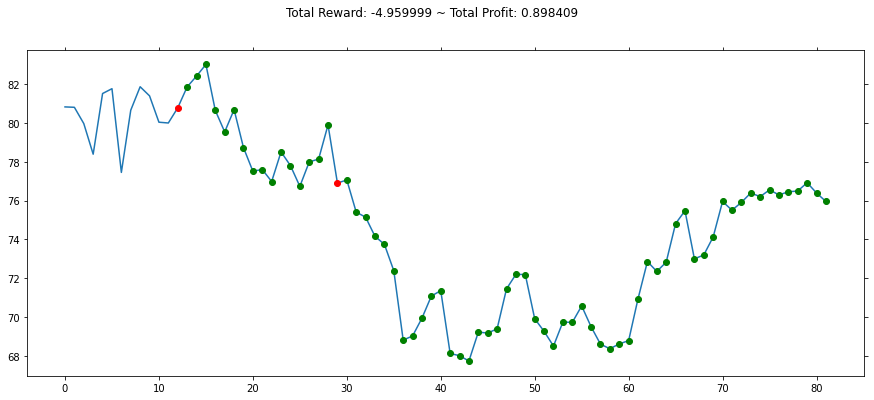

In [38]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()

plt.savefig("HDFC1.png",dpi=100)
plt.show()

<Figure size 432x288 with 0 Axes>

In [30]:
! git add "HDFCstocksTrader.ipynb"
! git commit -m "HDFC"
! git push origin main

The file will have its original line endings in your working directory


[main 21b8272] HDFC
 1 file changed, 3350 insertions(+)
 create mode 100644 StockTrading/HDFCstocksTrader.ipynb


To https://github.com/sumit-mandal/Reinforcement-Learning-Project
   60b5b81..21b8272  main -> main
